In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read data
df = pd.read_csv('/Users/haohao/OneDrive - York University/MMAI 5000_Group Project/dataframe_Group Project Data-SFD Data-Toronto Police copy.csv')

# check data
df.head()


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


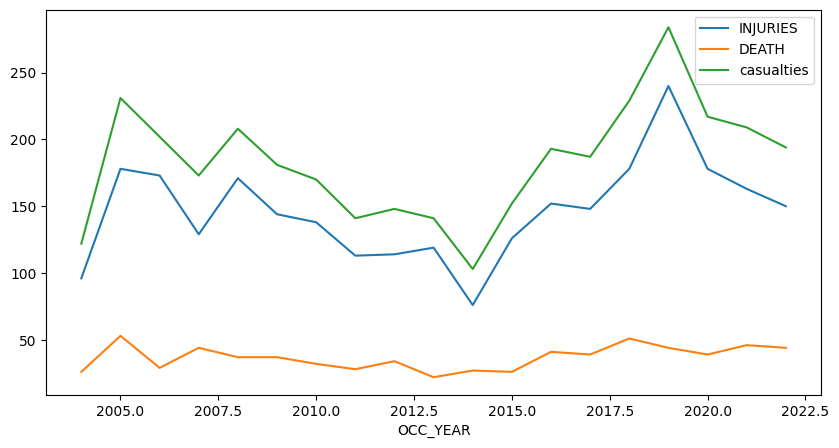

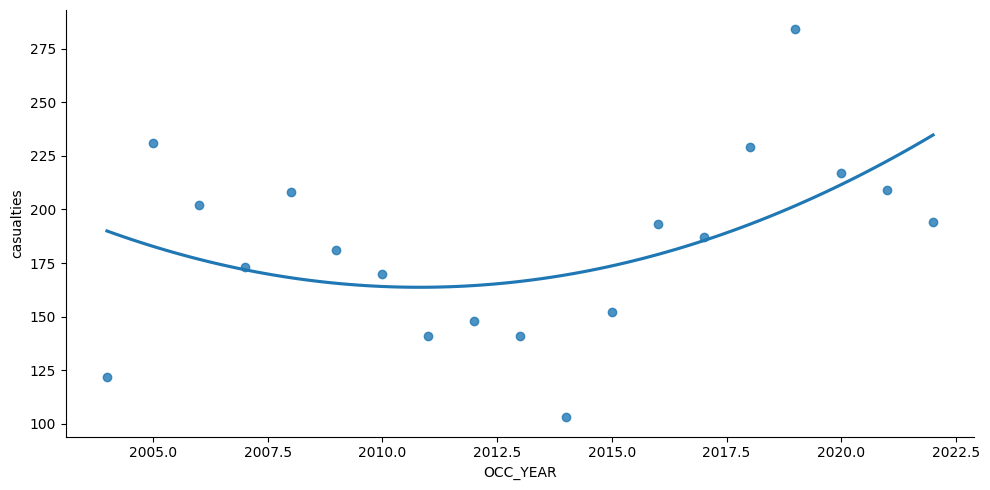

In [15]:
# to see the death and injury number in each year
df.groupby('OCC_YEAR').agg({'INJURIES': 'sum', 'DEATH': 'sum'})

# combine the death and injury number
df['casualties'] = df['INJURIES'] + df['DEATH']

# to see the casualties number in each year
df.groupby('OCC_YEAR').agg({'INJURIES': 'sum', 'DEATH': 'sum', 'casualties': 'sum'})

# draw a line chart to see the casualties number in each year
df.groupby('OCC_YEAR').agg({'INJURIES': 'sum', 'DEATH': 'sum', 'casualties': 'sum'}).plot(kind='line', figsize=(10, 5))

# draw a trend line to see the casualties number in each year
sns.lmplot(x='OCC_YEAR', y='casualties', data=df.groupby('OCC_YEAR').agg({'INJURIES': 'sum', 'DEATH': 'sum', 'casualties': 'sum'}).reset_index(), ci=None, order=2, truncate=True, height=5, aspect=2)

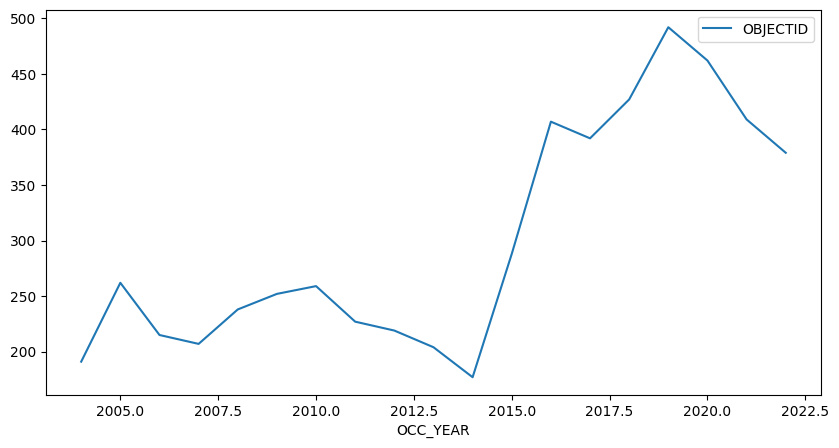

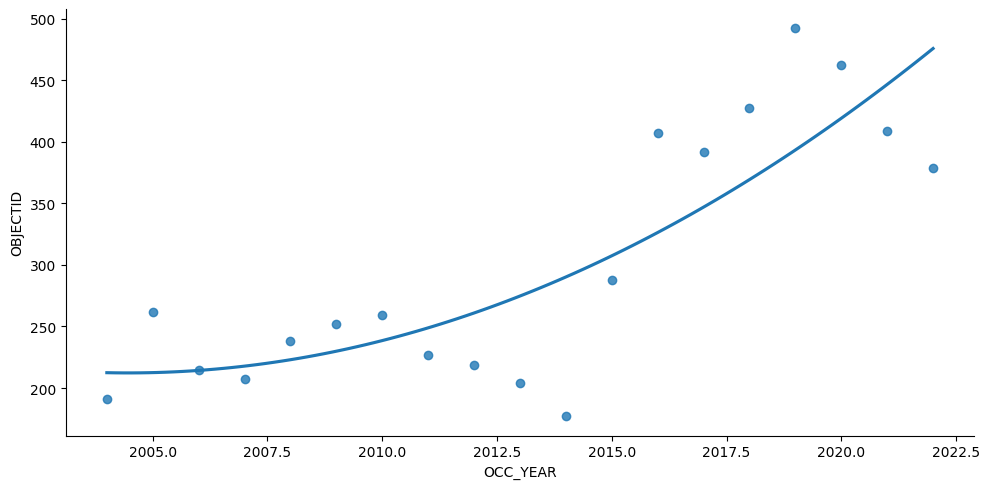

In [18]:
# count OBJECTID in each year
df.groupby('OCC_YEAR').agg({'OBJECTID': 'count'})

# draw a line chart to see the OBJECTID number in each year
df.groupby('OCC_YEAR').agg({'OBJECTID': 'count'}).plot(kind='line', figsize=(10, 5))

# draw a trend line to see the OBJECTID number in each year
sns.lmplot(x='OCC_YEAR', y='OBJECTID', data=df.groupby('OCC_YEAR').agg({'OBJECTID': 'count'}).reset_index(), ci=None, order=2, truncate=True, height=5, aspect=2)